<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Wiederholung" data-toc-modified-id="Wiederholung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Wiederholung</a></span><ul class="toc-item"><li><span><a href="#Skalare-lineare-DGL-erster-Ordnung" data-toc-modified-id="Skalare-lineare-DGL-erster-Ordnung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Skalare lineare DGL erster Ordnung</a></span></li><li><span><a href="#Skalare-lineare-DGL-zweiter-Ordnung" data-toc-modified-id="Skalare-lineare-DGL-zweiter-Ordnung-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Skalare lineare DGL zweiter Ordnung</a></span></li></ul></li><li><span><a href="#Pendelgleichung-(physikalisches-Pendel)" data-toc-modified-id="Pendelgleichung-(physikalisches-Pendel)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pendelgleichung (physikalisches Pendel)</a></span><ul class="toc-item"><li><span><a href="#Phasenraum-und-Trajektorien" data-toc-modified-id="Phasenraum-und-Trajektorien-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Phasenraum und Trajektorien</a></span></li></ul></li><li><span><a href="#Bessel-Differentialgleichung" data-toc-modified-id="Bessel-Differentialgleichung-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bessel Differentialgleichung</a></span></li><li><span><a href="#Bernoulli-DGL" data-toc-modified-id="Bernoulli-DGL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bernoulli DGL</a></span></li></ul></div>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
x,t,n = symbols('x t n')
y = Function('y')
u = Function('u')

# Lektion 13
# Differentialgleichungen Teil 2
## Wiederholung
### Skalare lineare DGL erster Ordnung

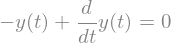

In [2]:
y = Function('y')
t, tau = symbols('t tau', real = True)
dgl = Eq(y(t).diff(t)-y(t), 0)
dgl

In [3]:
awe = {y(0) : 1} # Anfangswert

In [4]:
dsolve(dgl,y(t),ics=awe)

### Skalare lineare DGL zweiter Ordnung
#### Anfangswertproblem

$$\ddot{y}(t) = -2 \dot{y}(t) - y(t) + 3\cos(t)\quad \mbox{ für } t \in (1,10)$$
$$ y(1) = 1,\ \dot{y}(1) = -1 \quad\mbox{ Anfangswerte }$$ 

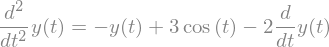

In [5]:
dgl2 = Eq(y(t).diff(t,2), -2*y(t).diff(t) - y(t) + 3*cos(t))
dgl2

In [6]:
awe = {y(1) : 1, y(t).diff(t).subs(t,1) : 1}

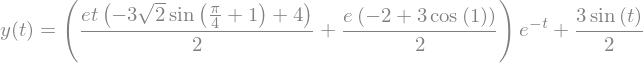

In [7]:
asol = dsolve(dgl2, y(t), ics=awe)
asol

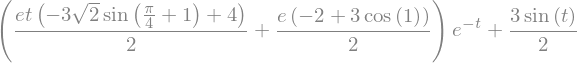

In [8]:
asol.rhs

In [9]:
#asoln = lambdify(t,asol.rhs) # das funktioniert in neueren Sympyversionen


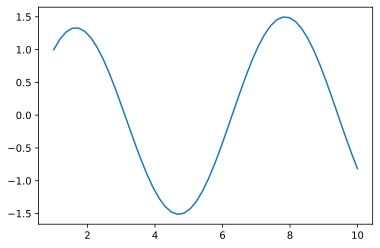

In [10]:
asoln = lambdify(t, asol.rhs, modules=[{'e' : np.exp(1)}, 'numpy']) # workaround für ältere Versionen
tn = np.linspace(1,10)

fig = plt.figure(1)
ax = fig.gca()
ax.plot(tn,asoln(tn))

#### Randwertproblem

$$\ddot{y}(t) = -2 \dot{y}(t) - y(t) + 3\cos(t)\quad \mbox{ für } t \in (1,10)$$
$$ y(1) = 1,\ y(10) = -2 \quad\mbox{ Randwerte }$$ 

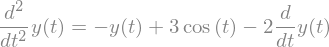

In [11]:
rwe = {y(1):1, y(10):-2}
dgl2

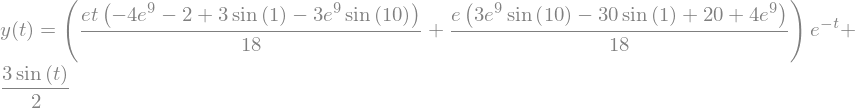

In [12]:
rsol = dsolve(dgl2, y(t), ics=rwe)
rsol

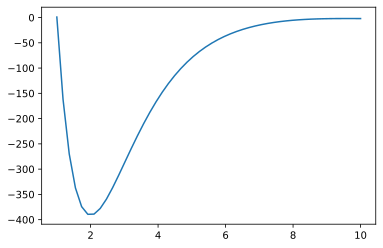

In [13]:
rsoln = lambdify(t,rsol.rhs, modules=[{'E':np.exp(1)}, 'numpy'])
tn = np.linspace(1,10)

fig = plt.figure(2)
ax = fig.gca()
ax.plot(tn,rsoln(tn))

## Pendelgleichung (physikalisches Pendel)

$$ \ddot{\alpha}(t) = - \sin(\alpha(t)) $$

äquivalent zu System 1. Ordnung


$$ y_1(t) := \alpha(t), \ y_2(t) := \frac{d}{dt}\alpha(t) $$

\begin{eqnarray*}
\dot{y}_1(t) &=& y_2(t) \\
\dot{y}_2(t) &=& -\sin(y_1(t))
\end{eqnarray*}

$y_1$: Winkel

$y_2$: Winkelgeschwindigkeit

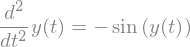

In [14]:
dgl = Eq(y(t).diff(t,2),-sin(y(t)))
dgl

In [15]:
dsolve(dgl)

NotImplementedError: solve: Cannot solve sin(y(t)) + Derivative(y(t), (t, 2))

### Phasenraum und Trajektorien

vgl. Ana II Kurzskript Kap. 19 http://www.math.uni-duesseldorf.de/~internet/ana2_19/vorlesung.pdf


In [16]:
# Achtung die Reihenfolge von y und t ist hier im Vergleich zu obiger Ana II Vorlesung vertauscht
def f(y, t):
    y1 = y[0]
    y2 = y[1]
    return y2,-np.sin(y1)

In [17]:
y1 = np.linspace(-3.0, 3.0, 15)
y2 = np.linspace(-2.0, 2.0, 10)
Y1, Y2 = np.meshgrid(y1, y2)
t0 = 0

In [18]:
U, V = f([Y1, Y2], t0)

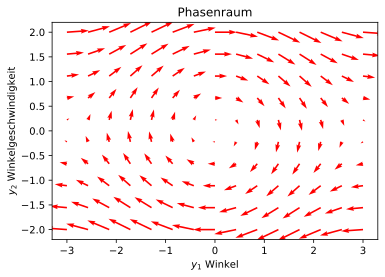

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Phasenraum')
ax.quiver(Y1, Y2, U, V, angles='xy', color='r')
ax.set_aspect('equal');
ax.set_xlabel('$y_1$ Winkel');
ax.set_ylabel('$y_2$ Winkelgeschwindigkeit' );

In [20]:
from scipy.integrate import odeint  # numerische Integration (numerisches Lösungsverfahren für DGL)
tn = np.linspace(0,1,10)
y0 = [0.0, 1] # Anfangswert
yn = odeint(f, y0, tn) #berechnet Näherungslösung y für jeden Wert in tn
yn

array([[0.        , 1.        ],
       [0.11088278, 0.99383983],
       [0.22040221, 0.97550971],
       [0.32722793, 0.94544907],
       [0.43009301, 0.90435276],
       [0.52781962, 0.85312046],
       [0.61933847, 0.79279585],
       [0.70370131, 0.72450326],
       [0.78008653, 0.64938844],
       [0.84779864, 0.56856905]])

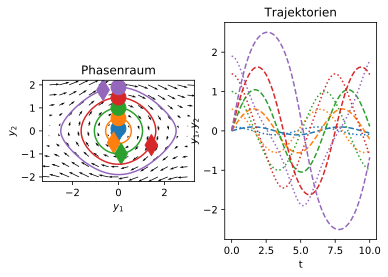

In [21]:

fig = plt.figure(3)

ax1 = fig.add_subplot(121)
ax1.quiver(Y1, Y2, U, V, angles='xy', color='k')
ax1.set_aspect('equal');
ax1.set_xlabel('$y_1$');
ax1.set_ylabel('$y_2$');
ax1.set_title('Phasenraum')

ax2 = fig.add_subplot(122)
ax2.set_title('Trajektorien')

tn = np.linspace(0, 10, 100)
for y20 in np.linspace(0.1, 1.9, 5):
    y0 = [0.0, y20]
    
    yn = odeint(f, y0, tn)
    
    line, = ax1.plot(yn[:,0], yn[:,1], '-') # Phasenporträt (Lösung im Phasenraum) 
    ax1.plot(yn[0,0], yn[0,1], 'o', color=line.get_color(), markersize=15)  # Startwert
    ax1.plot(yn[-1,0], yn[-1,1], 'd', color=line.get_color(), markersize=15) # Wert zum Endzeitpunkt
    
    ax2.plot(tn, yn[:,0], '--', color=line.get_color()) # y_1
    ax2.plot(tn, yn[:,1], ':', color=line.get_color())  # y_2
    ax2.set_xlabel('t')
    ax2.set_ylabel('$y_1, y_2$')

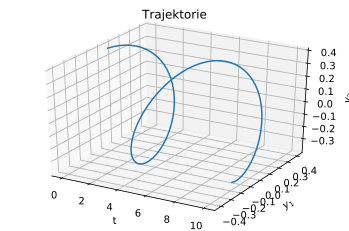

In [22]:
from mpl_toolkits.mplot3d import Axes3D

y0 = [0.0,0.4]
yn = odeint(f,y0,tn)

fig = plt.figure(4)
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(tn,yn[:,0],yn[:,1])
ax.set_xlabel('t')
ax.set_ylabel('$y_1$')
ax.set_zlabel('$y_2$')
ax.set_title('Trajektorie')
plt.show()

In [23]:
ax.view_init(0, 0)
plt.show()

In [24]:
ax.view_init(0, 90)
plt.show()

In [25]:
ax.view_init(90,-90)
plt.show()

falls der Winkel klein ist, ist 
$$
\sin(\alpha) \approx \alpha
$$
und wir erhalten als Approximation 
\begin{align}
\dot{u}_1(t) = u_2(t) \\
\dot{u}_2(t) = -u_1(t))
\end{align}

In [26]:
dgl3 = Eq(u(t).diff(t,2), -u(t))
awe = {u(0):y0[0], u(t).diff(t).subs(t,0):y0[1]}
awe
sol3 = dsolve(dgl3, u(t), ics=awe).rhs

ValueError: Couldn't solve for initial conditions

NameError: name 'sol3' is not defined

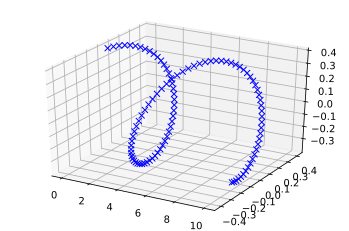

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(tn,yn[:,0],yn[:,1],'bx')
ax.plot3D(tn,lambdify(t,sol3)(tn),lambdify(t,sol3.diff(t))(tn),'ro')
ax.set_xlabel('t')
ax.set_ylabel('$u_1$')
ax.set_zlabel('$u_2$')
ax.set_title('Trajektorie')
plt.show()

## Bessel Differentialgleichung

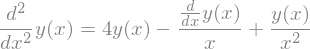

In [28]:
dgl = Eq(y(x).diff(x,2), -1/x * y(x).diff(x)+ 1/x**2*y(x) + 4*y(x))
dgl

In [29]:
# dsolve(dgl) # funktioniert nicht

In [30]:
a = symbols('a:18')
N = len(a)

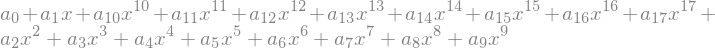

In [31]:
ys = sum([a[j]*x**j for j in range(N)])
ys

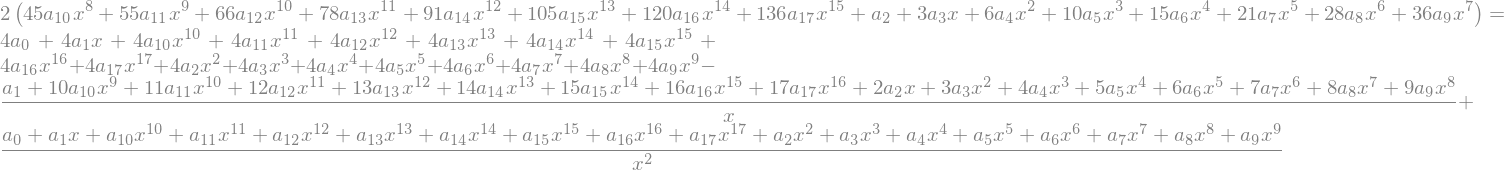

In [32]:
gl = dgl.subs(y(x),ys).doit()
gl

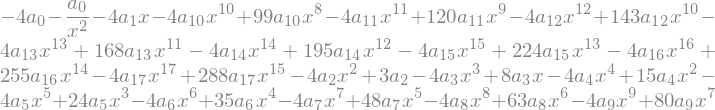

In [33]:
gl1 = (gl.lhs - gl.rhs).expand()
gl1

In [34]:
##gl1.as_poly(t).all_coeffs()
# klappt nicht

In [35]:
gl1.coeff(x**(-2))

In [36]:
gl1.coeff(x**(-1))

In [37]:
gl1.coeff(x,-1)

In [38]:
gl1.coeff(x,0) # x Term

In [39]:
gls = []
for j in range(N+1):
    glg = Eq(gl1.coeff(x,j-2),0)
    #if glg != True:
    gls.append(glg)
gls

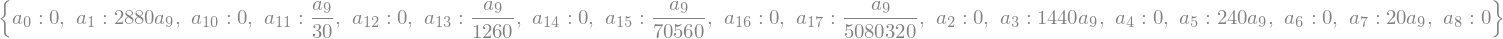

In [40]:
solve(gls[:-1])

In [41]:
var = list(a).copy()
del var[1]
var

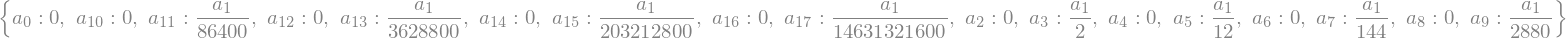

In [42]:
Lsg = solve(gls[:-1],var)
Lsg

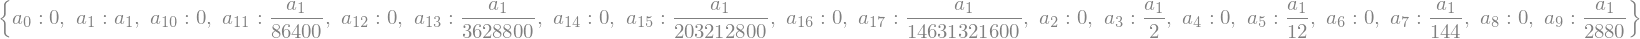

In [43]:
Lsg[a[1]] = a[1]
Lsg

In [44]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]] for j in range(int(N/2)-2)]
q

In [45]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]]/(j+2) for j in range(int(N/2)-2)]
q

Also ist 
$$
\frac{a_{2j+1}}{a_{2j+3}} = (j+1)(j+2)
$$
Test

In [46]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]] - (j+1)*(j+2) for j in range(int(N/2)-2)]
q

und damit
$$
a_{2n+1} = \prod_{j=0}^{n-1} \frac{1}{(j+1)(j+2)} a_1 = \frac{a_1}{(n)!(n+1)!}
$$

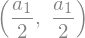

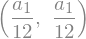

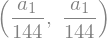

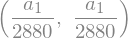

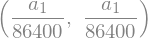

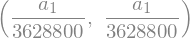

In [47]:
for j in range(int(N/2)-2):
    display((Lsg[a[2*j+1]], a[1]/factorial(j)/factorial(j+1)))

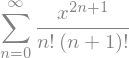

In [48]:
yR = Sum(x**(2*n+1)/factorial(n)/factorial(n+1),(n,0,oo))
yR

In [49]:
u = yR.doit()
u

In [50]:
srepr(u)

"besseli(Integer(1), Mul(Integer(2), Symbol('x')))"

In [51]:
?besseli

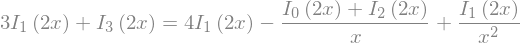

In [52]:
tmp  = dgl.subs(y(x),u).doit()
tmp

In [53]:
simplify(tmp.lhs - tmp.rhs)

## Bernoulli DGL

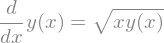

In [54]:
dgl = Eq(y(x).diff(x),sqrt(x*y(x)))
dgl

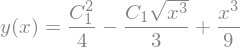

In [57]:
sol = dsolve(dgl)
sol

In [59]:
C1 = sol.atoms(Symbol).difference(dgl.atoms(Symbol)).pop()

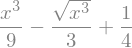

In [61]:
sol.rhs.subs(C1,1)

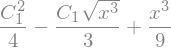

In [66]:
y = sol.rhs
y

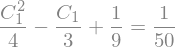

In [67]:
gl1 = Eq(y.subs(x,1),Rational(1,50)) #Startwert
gl1

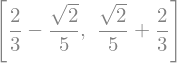

In [68]:
K1 = solve(gl1)
K1